<a href="https://colab.research.google.com/github/alex-trindade/DataScience/blob/main/Analisando_Dados_Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Referencias
https://www.paho.org/pt/covid19/historico-da-pandemia-covid-19


<img src="https://br.freepik.com/vetores-gratis/fundo-de-explosao-de-doenca-de-covid19-de-coronavirus-com-virus-flutuante_7643631.htm#query=covid19&position=1&from_view=search">

## Panorama da Covid-19
Em 31 de dezembro de 2019, a Organização Mundial da Saúde (OMS) foi alertada sobre vários casos de pneumonia em Wuhan, província de Hubei, República Popular da China. Uma nova cepa (tipo) de coronavírus ainda desconhecida em humanos.

Em 7 de janeiro de 2020, as autoridades chinesas confirmaram que haviam descoberto um novo tipo de coronavírus. O mais recente novo coronavírus (inicialmente chamado provisoriamente de 2019-nCoV e chamado SARS-CoV-2 em 11 de fevereiro de 2020).

Pouco mais de dois anos após o início do da pandemia podemos ver o quão devastador foi poder do vírus. No momento da escrita deste trabalho o Covid-19 fez mais de 6,19 milhões de mortes com pouco mais 500 milhões de casos em todo mundo.


In [ ]:
#importação das bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Importando a base de dados
df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

#Verificando as 5 primeiras colunas
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [ ]:
#Verificando o tamanho da base
print(f"A Base possui {df.shape[0]} linhas e {df.shape[1]} colunas.")

A Base possui 177381 linhas e 67 colunas.


In [ ]:
#identificando os nomes das colunas
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [ ]:
#Identificando o tipo de variáveis
for chave,valor in zip(df.dtypes.keys(),df.dtypes):
  print(f"{chave} {'_'*(50-len(chave))} {valor}")

In [ ]:
#Identificando valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

stringency_index                           1.000000
weekly_icu_admissions_per_million          0.967443
weekly_icu_admissions                      0.967443
excess_mortality_cumulative_per_million    0.965735
excess_mortality                           0.965735
                                             ...   
total_cases                                0.035720
population                                 0.006252
date                                       0.000000
location                                   0.000000
iso_code                                   0.000000
Length: 67, dtype: float64

In [ ]:
df.date = pd.to_datetime(df.date)
df.dtypes

iso_code                                           object
continent                                          object
location                                           object
date                                       datetime64[ns]
total_cases                                       float64
                                                ...      
human_development_index                           float64
excess_mortality_cumulative_absolute              float64
excess_mortality_cumulative                       float64
excess_mortality                                  float64
excess_mortality_cumulative_per_million           float64
Length: 67, dtype: object

In [ ]:
df.loc[df.date >= df.date.max()].sort_values(by="total_cases", ascending=False)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
175149,OWID_WRL,NaN,World,2022-04-08,497493302.0,1150125.0,1126260.714,6174449.0,3748.0,3404.286,...,6.434,34.635,60.130,2.705,72.58,0.737,NaN,NaN,NaN,NaN
70574,OWID_HIC,NaN,High income,2022-04-08,280039573.0,915849.0,919868.286,2332189.0,2566.0,2279.714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52440,OWID_EUR,NaN,Europe,2022-04-08,184872929.0,515776.0,543989.571,1787972.0,1660.0,1498.429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9315,OWID_ASI,NaN,Asia,2022-04-08,143654759.0,423973.0,431531.857,1414712.0,1033.0,907.714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53247,OWID_EUN,NaN,European Union,2022-04-08,130321466.0,455433.0,473701.143,1056360.0,1007.0,976.714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96749,MAC,Asia,Macao,2022-04-08,82.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,84.24,NaN,NaN,NaN,NaN,NaN
172241,VAT,Europe,Vatican,2022-04-08,29.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,75.12,NaN,NaN,NaN,NaN,NaN
102020,MHL,Oceania,Marshall Islands,2022-04-08,7.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,82.502,2.700,73.70,0.704,NaN,NaN,NaN,NaN
134152,SHN,Africa,Saint Helena,2022-04-08,4.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,80.56,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.loc[df.date >= df.date.max()].sort_values(by="total_deaths", ascending=False)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
175149,OWID_WRL,NaN,World,2022-04-08,497493302.0,1150125.0,1126260.714,6174449.0,3748.0,3404.286,...,6.434,34.635,60.130,2.705,72.58,0.737,NaN,NaN,NaN,NaN
169450,OWID_UMC,NaN,Upper middle income,2022-04-08,125696729.0,157475.0,124273.286,2495962.0,898.0,846.429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70574,OWID_HIC,NaN,High income,2022-04-08,280039573.0,915849.0,919868.286,2332189.0,2566.0,2279.714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52440,OWID_EUR,NaN,Europe,2022-04-08,184872929.0,515776.0,543989.571,1787972.0,1660.0,1498.429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118429,OWID_NAM,NaN,North America,2022-04-08,95027433.0,101864.0,50591.286,1419732.0,738.0,644.429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96749,MAC,Asia,Macao,2022-04-08,82.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,84.24,NaN,NaN,NaN,NaN,NaN
102020,MHL,Oceania,Marshall Islands,2022-04-08,7.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,82.502,2.700,73.70,0.704,NaN,NaN,NaN,NaN
104800,FSM,Oceania,Micronesia (country),2022-04-08,1.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,67.88,0.620,NaN,NaN,NaN,NaN
134152,SHN,Africa,Saint Helena,2022-04-08,4.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,80.56,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.loc[(df.date >= df.date.max()) & (df.continent.notnull())].sort_values(by="total_deaths", ascending=False)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
167900,USA,North America,United States,2022-04-08,80386635.0,94152.0,35082.714,985205.0,634.0,536.429,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
23062,BRA,South America,Brazil,2022-04-08,30125540.0,30212.0,21003.857,661377.0,149.0,158.857,...,10.1,17.9,NaN,2.20,75.88,0.765,NaN,NaN,NaN,NaN
74478,IND,Asia,India,2022-04-08,43034217.0,1150.0,1026.000,521656.0,83.0,56.000,...,1.9,20.6,59.550,0.53,69.66,0.645,NaN,NaN,NaN,NaN
132817,RUS,Europe,Russia,2022-04-08,17707591.0,14123.0,15097.714,363731.0,276.0,293.143,...,23.4,58.3,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN
104357,MEX,North America,Mexico,2022-04-08,5719829.0,4325.0,8250.857,323595.0,87.0,66.857,...,6.9,21.4,87.847,1.38,75.05,0.779,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96749,MAC,Asia,Macao,2022-04-08,82.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,84.24,NaN,NaN,NaN,NaN,NaN
102020,MHL,Oceania,Marshall Islands,2022-04-08,7.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,82.502,2.70,73.70,0.704,NaN,NaN,NaN,NaN
104800,FSM,Oceania,Micronesia (country),2022-04-08,1.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,67.88,0.620,NaN,NaN,NaN,NaN
134152,SHN,Africa,Saint Helena,2022-04-08,4.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,80.56,NaN,NaN,NaN,NaN,NaN


In [ ]:
def colorBar(location):
  if location == 'Brazil':
    return '#253760'
  else:
    return '#CFCDCE'

In [ ]:
df_top5 = df.loc[(df.date >= df.date.max()) & (df.continent.notnull())].sort_values(by='total_deaths', ascending=False)
df_top5 = df_top5.head()
df_top5['color'] = df_top5['location'].apply(lambda x: 'red' if 'Brazil' else 'blue')  
df_top5

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,color
167900,USA,North America,United States,2022-04-08,80386635.0,94152.0,35082.714,985205.0,634.0,536.429,...,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN,red
23062,BRA,South America,Brazil,2022-04-08,30125540.0,30212.0,21003.857,661377.0,149.0,158.857,...,17.9,NaN,2.20,75.88,0.765,NaN,NaN,NaN,NaN,red
74478,IND,Asia,India,2022-04-08,43034217.0,1150.0,1026.000,521656.0,83.0,56.000,...,20.6,59.550,0.53,69.66,0.645,NaN,NaN,NaN,NaN,red
132817,RUS,Europe,Russia,2022-04-08,17707591.0,14123.0,15097.714,363731.0,276.0,293.143,...,58.3,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN,red
104357,MEX,North America,Mexico,2022-04-08,5719829.0,4325.0,8250.857,323595.0,87.0,66.857,...,21.4,87.847,1.38,75.05,0.779,NaN,NaN,NaN,NaN,red


In [ ]:
def autolabel(barras):
  for barra in barras:
    y = '{0:,.0f}'.format(barra.get_height()).replace(',','.')
    ax.annotate(f'{y}',(barra.get_x()+barra.get_width()/2,barra.get_height()),xytext=(0,5),textcoords='offset points',ha='center')


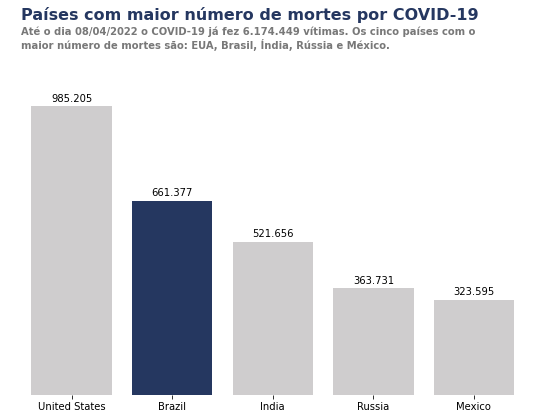

In [ ]:
ultimo_dia = (df.loc[(df.location == 'World')])['date'].max()
morte_mundo= (df.loc[(df.location == 'World')])['total_deaths'].max()
morte_mundo= '{0:,.0f}'.format(morte_mundo).replace(',','.')
fig, ax = plt.subplots(figsize=(8, 6))
total_mortes = ax.bar(df_top5['location'],df_top5['total_deaths'],
                      color=df_top5['location'].apply(colorBar))
x_text_antes = 0.2


##### REMOVER ELEMENTOS NÃO ESSENCIAIS DA FIGURA

# Remover grids e eixos
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
# Remover eixo y
plt.gca().axes.get_yaxis().set_visible(False)
# Adicionando um título
plt.text(x=-0.5, 
         y=df_top5['total_deaths'].max()*1.3, 
         s='Países com maior número de mortes por COVID-19',
         fontsize=16, 
         color='#253760',
         weight='bold',
)
plt.text(x=-0.5, 
         y=df_top5['total_deaths'].max()*1.2,
         s=f'Até o dia {ultimo_dia.strftime("%d/%m/%Y")} o COVID-19 já fez {morte_mundo}'+
         ' vítimas. Os cinco países com o \nmaior número de '
         'mortes são: EUA, Brasil, Índia, Rússia e México.',
         fontsize=10, 
         color='#787878',
         weight='bold',
)

autolabel(total_mortes)
plt.tight_layout()

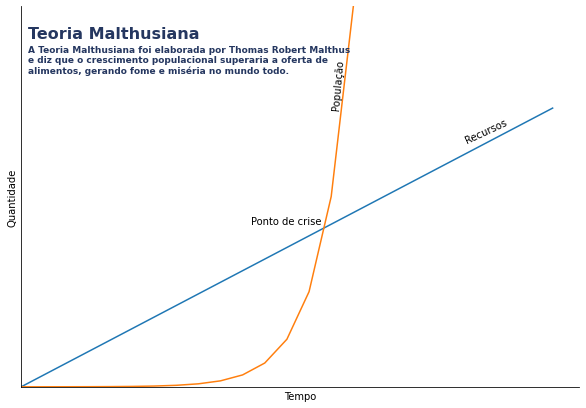

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,7))
tam=16
tempo = list(range(tam))
recursos = [ n*1000 for n in range(0, 25) ]
populacao = [ 2 * 2 ** (n - 1) for n in range(0, tam) ]
plt.plot(list(range(25)), recursos )
plt.plot(tempo, populacao);
plt.annotate('Recursos', xy=(20, recursos[-4]), rotation=25, xytext=(0,0), textcoords='offset points')
plt.annotate('População', xy=(14, recursos[-1]), rotation=85, xytext=(0,0), textcoords='offset points')
plt.xlim(0)
plt.ylim(0,populacao[-1])
plt.xlabel('Tempo')
plt.ylabel('Quantidade')

# Remover grids e eixos
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Remover eixo y
#plt.gca().axes.get_yaxis().set_visible(False)
#plt.gca().axes.get_xaxis().set_visible(False)
plt.xticks([])   
plt.yticks([])
plt.text(x=0.3, 
         y=30000, 
         s='Teoria Malthusiana',
         fontsize=16, 
         color='#253760',
         weight='bold',
)
plt.text(x=0.3, 
         y=27000, 
         s='A Teoria Malthusiana foi elaborada por Thomas Robert Malthus\n'
         'e diz que o crescimento populacional superaria a oferta de \n'+
         'alimentos, gerando fome e miséria no mundo todo.',
         fontsize=9, 
         color='#253760',
         weight='bold',
)


for y1,y2 in (zip(populacao[1:], recursos[1:])):  
  if y1 >= y2:    
    plt.annotate('Ponto de crise', xy=(14, y2), xytext=(-10,0), textcoords='offset points',ha='right')
    break
    
